#### analysis ensenbl result
(the result for credible set index != 0)

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from upsetplot import plot, from_memberships, generate_counts

In [2]:
baseline = pd.read_csv('/gpfs/commons/home/tlin/output/vep/baseline.txt', sep = '\t')
omics = pd.read_csv('/gpfs/commons/home/tlin/output/vep/omics.txt', sep = '\t')
omics_dl = pd.read_csv('/gpfs/commons/home/tlin/output/vep/omics_dl.txt', sep = '\t')
susie = pd.read_csv('/gpfs/commons/home/tlin/output/vep/susie.txt', sep = '\t')

In [37]:
baseline

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,AF,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
0,rs4233366,1:161159147-161159147,T,3_prime_UTR_variant,MODIFIER,ADAMTS4,ENSG00000158859,Transcript,ENST00000367996.5,protein_coding,...,0.3960,-,-,1,"27182965,29333270,29582564,30661310,31095684",-,-,-,-,-
1,rs4233366,1:161159147-161159147,T,downstream_gene_variant,MODIFIER,ADAMTS4,ENSG00000158859,Transcript,ENST00000478394.1,processed_transcript,...,0.3960,-,-,1,"27182965,29333270,29582564,30661310,31095684",-,-,-,-,-
2,rs2070901,1:161185058-161185058,C,upstream_gene_variant,MODIFIER,FCER1G,ENSG00000158869,Transcript,ENST00000289902.1,protein_coding,...,-,-,-,1,"26792385,27746735,32929287,21819409,31293618,2...",-,-,-,-,-
3,rs2070901,1:161185058-161185058,T,upstream_gene_variant,MODIFIER,FCER1G,ENSG00000158869,Transcript,ENST00000289902.1,protein_coding,...,0.3908,-,-,1,"26792385,27746735,32929287,21819409,31293618,2...",-,-,-,-,-
4,rs2070901,1:161185058-161185058,C,upstream_gene_variant,MODIFIER,FCER1G,ENSG00000158869,Transcript,ENST00000367992.3,protein_coding,...,-,-,-,1,"26792385,27746735,32929287,21819409,31293618,2...",-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27210,rs12984029,HSCHR19LRC_PGF2_CTG1:54769392-54769392,A,upstream_gene_variant,MODIFIER,U6,ENSG00000262719,Transcript,ENST00000573050.1,snRNA,...,-,-,-,1,36224396,-,-,-,-,-
27211,rs12984029,HSCHR19LRC_PGF2_CTG1:54769392-54769392,A,upstream_gene_variant,MODIFIER,AC098789.1,ENSG00000262035,Transcript,ENST00000573970.1,processed_pseudogene,...,-,-,-,1,36224396,-,-,-,-,-
27212,rs436911,HSCHR19LRC_PGF2_CTG1:54786571-54786571,A,downstream_gene_variant,MODIFIER,CU104682.1,ENSG00000263702,Transcript,ENST00000578874.1,miRNA,...,-,-,-,-,-,-,-,-,-,-
27213,rs436911,HSCHR19LRC_PGF2_CTG1:54786571-54786571,C,downstream_gene_variant,MODIFIER,CU104682.1,ENSG00000263702,Transcript,ENST00000578874.1,miRNA,...,-,-,-,-,-,-,-,-,-,-


In [3]:
polyfun_path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/aggregate_finemap/remove_index0/'
baseline_polyfun = pd.read_csv(polyfun_path + 'bellenguez_baseline.txt', sep = '\t')
susie_polyfun = pd.read_csv(polyfun_path + 'bellenguez_susie.txt', sep = '\t')
omics_polyfun = pd.read_csv(polyfun_path + 'bellenguez_omics.txt', sep = '\t')
omics_dl_polyfun = pd.read_csv(polyfun_path + 'bellenguez_omics_dl.txt', sep = '\t')

In [4]:
def clean_up(df1, df2):
    raw_count = df1.shape[0]
    df_new = df1.merge(df2, left_on=['#Uploaded_variation', 'Allele'], right_on=['SNP', 'A2'])
    print("origin row = %d, after choosing the right allele, we got %d rows"%(df1.shape[0], df_new.shape[0]))
    gene = df_new.SYMBOL.unique()
    print("# gene: %d"%len(gene))
    return(df_new, gene)


In [6]:
print("susie")
susie, susie_gene = clean_up(susie, susie_polyfun)

print("baseline")
baseline, baseline_gene = clean_up(baseline, baseline_polyfun)

print("omics")
omics, omics_gene = clean_up(omics, omics_polyfun)

print("omics_dl")
omics_dl, omics_dl_gene = clean_up(omics_dl, omics_dl_polyfun)

susie
origin row = 20069, after choosing the right allele, we got 20069 rows
# gene: 242
baseline
origin row = 17563, after choosing the right allele, we got 17563 rows
# gene: 269
omics
origin row = 17088, after choosing the right allele, we got 17088 rows
# gene: 265
omics_dl
origin row = 26743, after choosing the right allele, we got 17049 rows
# gene: 242


In [7]:
common_gene = reduce(np.intersect1d, [susie_gene, baseline_gene, omics_gene, omics_dl_gene])
len(common_gene )

175

In [8]:
common_gene

array(['-', 'ABCA7', 'ABI3', 'AC010492.5', 'AC010900.2', 'AC011558.5',
       'AC011737.2', 'AC023271.1', 'AC023271.2', 'AC090559.2',
       'AC098789.1', 'AC098831.4', 'AC127032.1', 'AC127032.5',
       'AC138688.1', 'AC217772.1', 'AC217779.1', 'AC217779.2',
       'AC245052.1', 'ACE', 'ADAM10', 'AL901608.1', 'AL901608.2',
       'AL928768.3', 'ANK3', 'ANKH', 'APH1B', 'APP', 'ATP8B3', 'ATP8B4',
       'BLNK', 'C10orf40', 'CARF', 'CASS4', 'CCNE2', 'CD2AP', 'CLU',
       'CNN2', 'CR1', 'CRHR1', 'CSTF1', 'CTAGE5', 'CTB-129P6.4',
       'CTB-31O20.3', 'CTB-31O20.6', 'CTB-31O20.8', 'CTD-2165H16.4',
       'CTD-2501B8.5', 'CTD-3065J16.6', 'CU151838.1', 'CU457734.1',
       'CYC1', 'CYP20A1', 'DNTT', 'EEF1A1P13', 'EPHA1-AS1', 'FAM105B',
       'FAM117B', 'FAM63B', 'FBXO33', 'FDFT1', 'FERMT2', 'GAREM', 'HMHA1',
       'HS3ST5', 'ICA1L', 'IGHA1', 'IGHG1', 'IGHG3', 'IGHV1-58',
       'IGHV1-67', 'IGHV1-68', 'IGHV1-69', 'IGHV3-57', 'IGHV3-60',
       'IGHV3-62', 'IGHV3-63', 'IGHV3-64', 'IGHV3-65

In [169]:
np.array([element for element in common_gene if '.' not in element])

array(['-', 'ABCA7', 'ABI3', 'ACE', 'ADAM10', 'ANK3', 'ANKH', 'APH1B',
       'APP', 'ATP8B3', 'ATP8B4', 'BLNK', 'C10orf40', 'CARF', 'CASS4',
       'CCNE2', 'CD2AP', 'CLU', 'CNN2', 'CR1', 'CRHR1', 'CSTF1', 'CTAGE5',
       'CYC1', 'CYP20A1', 'DNTT', 'EEF1A1P13', 'EPHA1-AS1', 'FAM105B',
       'FAM117B', 'FAM63B', 'FBXO33', 'FDFT1', 'FERMT2', 'GAREM', 'HMHA1',
       'HS3ST5', 'ICA1L', 'IGHA1', 'IGHG1', 'IGHG3', 'IGHV1-58',
       'IGHV1-67', 'IGHV1-68', 'IGHV1-69', 'IGHV3-57', 'IGHV3-60',
       'IGHV3-62', 'IGHV3-63', 'IGHV3-64', 'IGHV3-65', 'IGHV3-66',
       'IGHV3-71', 'IGHV3-72', 'IGHV3-73', 'IGHV3-74', 'IGHV4-59',
       'IGHV4-61', 'IGHVII-60-1', 'IGHVII-62-1', 'IGHVII-65-1',
       'IGHVII-67-1', 'IGHVIII-67-2', 'IGHVIII-67-3', 'IGHVIII-67-4',
       'INPP5D', 'JAZF1', 'KANSL1', 'KLF16', 'KRT8P15', 'LILRB5', 'MAPT',
       'MAPT-AS1', 'MIR1909', 'MIR661', 'MME', 'NBEAL1', 'NCK2',
       'NDUFAF6', 'OPALIN', 'OPLAH', 'PHOSPHO1', 'PILRA', 'PILRB',
       'PLCG2', 'PLEC', 'PMS2P1

In [9]:
ad_gene = reduce(np.intersect1d, [omics_gene, omics_dl_gene])

In [10]:
ad_gene

array(['-', 'ABCA1', 'ABCA7', 'ABI3', 'AC002400.1', 'AC009506.1',
       'AC009961.2', 'AC009961.3', 'AC009961.5', 'AC010492.5',
       'AC010900.2', 'AC011558.5', 'AC011737.2', 'AC023271.1',
       'AC023271.2', 'AC089999.1', 'AC090559.2', 'AC098789.1',
       'AC098831.4', 'AC127032.1', 'AC127032.5', 'AC138688.1',
       'AC217772.1', 'AC217779.1', 'AC217779.2', 'AC245052.1', 'ACE',
       'ADAM10', 'AL901608.1', 'AL901608.2', 'AL928768.3', 'ALDOA',
       'ANK3', 'ANKH', 'APH1B', 'APP', 'ATP8B3', 'ATP8B4', 'BAZ2B',
       'BLNK', 'BZRAP1', 'BZRAP1-AS1', 'C10orf40', 'C16orf92', 'CARF',
       'CASS4', 'CCDC42B', 'CCNE2', 'CD2AP', 'CD302', 'CLU', 'CNN2',
       'COG7', 'CR1', 'CRHR1', 'CSTF1', 'CTAGE5', 'CTB-129P6.4',
       'CTB-31O20.3', 'CTB-31O20.6', 'CTB-31O20.8', 'CTD-2165H16.4',
       'CTD-2196E14.6', 'CTD-2270L9.2', 'CTD-2270L9.4', 'CTD-2501B8.5',
       'CTD-3065J16.6', 'CTSH', 'CU104682.1', 'CU151838.1', 'CU457734.1',
       'CU457734.3', 'CYC1', 'CYP20A1', 'DDX54', 'DNTT',

In [12]:
other_three = reduce(np.intersect1d, [baseline_gene, omics_gene, omics_dl_gene])


In [13]:
#only_susie
susie_gene[~np.isin(susie_gene,other_three)]


array(['AL691452.1', 'RP11-98J9.1', 'PSMA1', 'PDE3B', 'CYP2R1', 'MIR4487',
       'RAPSN', 'RNU6-1302P', 'PICALM', 'CPNE8', 'IGHEP1', 'RN7SKP95',
       'ANKRD26P1', 'ITFG1', 'RP11-523L20.2', 'RP11-44I10.5', 'USP6',
       'ZNF594', 'RABEP1', 'NUP88', 'RP11-420A6.2', 'AC225613.1',
       'CRHR1-IT1', 'AC225613.2', 'AC225613.6', 'AC217770.2',
       'AC217770.3', 'KANSL1-AS1', 'AC127032.4', 'AC127032.2',
       'RP11-259G18.2', 'RP11-259G18.3', 'RP11-259G18.1', 'ARL17B',
       'RP11-53I6.4', 'ITGB1BP1', 'ASAP2', 'CPSF3', 'IAH1', 'ADAM17',
       'RP11-400L8.2', 'RP11-214N9.1', 'RN7SL670P', 'COL6A3', 'RCAN1',
       'ZNF385D', 'RP11-457K10.1', 'TMEM175', 'DGKQ', 'RP11-380P13.1',
       'FAM13A', 'SETD7', 'CCT6P2', 'DOK3', 'DDX41', 'RP11-1334A24.6',
       'FAM193B', 'RP11-1277A3.3', 'TREML4', 'RNA5SP207', 'RP11-812I20.2',
       'RPA3-AS1', 'ZCWPW1', 'RP11-458K10.2', 'THEM6', 'CTD-2292P10.2',
       'CTD-2292P10.4'], dtype=object)

In [93]:
def gene_count(df, anno_name):
    gene, count = np.unique(df.SYMBOL, return_counts=True)
    df = pd.DataFrame({"gene": gene, "count":count})
    df['anno'] = anno_name
    return df

In [96]:
susie_gene = gene_count(susie, 'susie')
baseline_gene = gene_count(baseline, 'baseline')
omics_gene = gene_count(omics, 'omics')
omics_dl_gene = gene_count(omics_dl, 'omics_dl')

In [144]:
from upsetplot import from_contents
gene_list = from_contents({'susie':susie_gene.gene.to_list(),
                          'baseline':baseline_gene.gene.to_list(),
                          'omcis':omics_gene.gene.to_list(),
                          'omics_dl':omics_dl_gene.gene.to_list()}
                         )

<Figure size 1080x432 with 0 Axes>

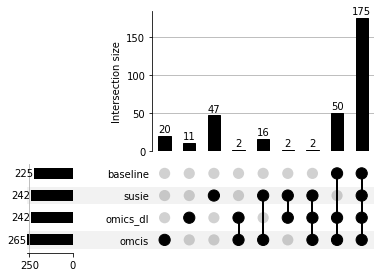

In [155]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
gene_plot = UpSet(gene_list , show_counts=True).plot()
plt.savefig('/gpfs/commons/home/tlin/pic/PRS/gene_overlap.pdf',transparent=True)